# Read the data 

In [1]:
import pandas as pd
original_df = pd.read_csv('CS_data.txt', sep='\t',low_memory=False)
print(original_df.head())

   ID_CLIENT CLERK_TYPE  PAYMENT_DAY APPLICATION_SUBMISSION_TYPE  \
1          1          C       -99999                           0   
2          2          C       -99999                         Web   
3          3          C       -99999                           0   
4          4          C       -99999                         Web   
5          5          C       -99999                         Web   

   QUANT_ADDITIONAL_CARDS  POSTAL_ADDRESS_TYPE SEX  MARITAL_STATUS  \
1                       0                    1   F               6   
2                       0                    1   F               2   
3                       0                    1   F               2   
4                       0                    1   F               2   
5                       0                    1   M               2   

   QUANT_DEPENDANTS  EDUCATION_LEVEL  ... FLAG_HOME_ADDRESS_DOCUMENT FLAG_RG  \
1                 1              NaN  ...                          0       0   
2         

# Select the variables that will be used to analyse later. 

In [2]:
selected_df = original_df[['QUANT_DEPENDANTS',
                           'NATIONALITY',
                           'MARITAL_STATUS',
                           'POSTAL_ADDRESS_TYPE',
                           'PERSONAL_MONTHLY_INCOME',
                           'OTHER_INCOMES',
                           'QUANT_BANKING_ACCOUNTS',
                           'QUANT_SPECIAL_BANKING_ACCOUNTS',
                           'PERSONAL_ASSETS_VALUE',
                           'QUANT_CARS',
                           'FLAG_EMAIL',
                           'FLAG_VISA',
                           'FLAG_MASTERCARD',
                           'FLAG_DINERS',
                           'FLAG_AMERICAN_EXPRESS',
                           'FLAG_OTHER_CARDS',
                           'COMPANY',
                           'FLAG_PROFESSIONAL_PHONE',
                           'OCCUPATION_TYPE',
                           'RESIDENCE_TYPE',
                           'FLAG_RESIDENCIAL_PHONE',
                           'RESIDENCIAL_STATE',
                           'PRODUCT',
                           'AGE',
                            'MONTHS_IN_RESIDENCE',
                           'TARGET_LABEL_BAD.1']].copy()

selected_df.head()

,QUANT_DEPENDANTS,NATIONALITY,MARITAL_STATUS,POSTAL_ADDRESS_TYPE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,...,COMPANY,FLAG_PROFESSIONAL_PHONE,OCCUPATION_TYPE,RESIDENCE_TYPE,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_STATE,PRODUCT,AGE,MONTHS_IN_RESIDENCE,TARGET_LABEL_BAD.1
1,1,1,6,1,900.0,0.0,0,0,0.0,0,...,N,N,4.0,1.0,Y,RN,1,32,15.0,1
2,0,1,2,1,750.0,0.0,0,0,0.0,0,...,Y,N,4.0,1.0,Y,RJ,1,34,1.0,1
3,0,1,2,1,500.0,0.0,0,0,0.0,0,...,N,N,NaN,1.0,Y,RN,1,27,NaN,0
4,0,1,2,1,500.0,0.0,0,0,0.0,0,...,N,N,NaN,NaN,N,PE,1,61,NaN,0
5,0,1,2,1,1200.0,0.0,0,0,0.0,0,...,N,N,5.0,1.0,Y,RJ,1,48,12.0,1


# Data processing
The first of data processing is to check the structure of the data

In [3]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   QUANT_DEPENDANTS                50000 non-null  int64  
 1   NATIONALITY                     50000 non-null  int64  
 2   MARITAL_STATUS                  50000 non-null  int64  
 3   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 4   PERSONAL_MONTHLY_INCOME         50000 non-null  float64
 5   OTHER_INCOMES                   50000 non-null  float64
 6   QUANT_BANKING_ACCOUNTS          50000 non-null  int64  
 7   QUANT_SPECIAL_BANKING_ACCOUNTS  50000 non-null  int64  
 8   PERSONAL_ASSETS_VALUE           50000 non-null  float64
 9   QUANT_CARS                      50000 non-null  int64  
 10  FLAG_EMAIL                      50000 non-null  int64  
 11  FLAG_VISA                       50000 non-null  int64  
 12  FLAG_MASTERCARD                 

# Missing values
Once the structure of the data is known, the next step should be checking missing values.

In [4]:
missing_values = selected_df.isnull().sum()

missing_values

QUANT_DEPENDANTS                     0
NATIONALITY                          0
MARITAL_STATUS                       0
POSTAL_ADDRESS_TYPE                  0
PERSONAL_MONTHLY_INCOME              0
OTHER_INCOMES                        0
QUANT_BANKING_ACCOUNTS               0
QUANT_SPECIAL_BANKING_ACCOUNTS       0
PERSONAL_ASSETS_VALUE                0
QUANT_CARS                           0
FLAG_EMAIL                           0
FLAG_VISA                            0
FLAG_MASTERCARD                      0
FLAG_DINERS                          0
FLAG_AMERICAN_EXPRESS                0
FLAG_OTHER_CARDS                     0
COMPANY                              0
FLAG_PROFESSIONAL_PHONE              0
OCCUPATION_TYPE                   7313
RESIDENCE_TYPE                    1349
FLAG_RESIDENCIAL_PHONE               0
RESIDENCIAL_STATE                    0
PRODUCT                              0
AGE                                  0
MONTHS_IN_RESIDENCE               3777
TARGET_LABEL_BAD.1       

# Visualisation
Visualise the variables that contain missing values before dealing with them.

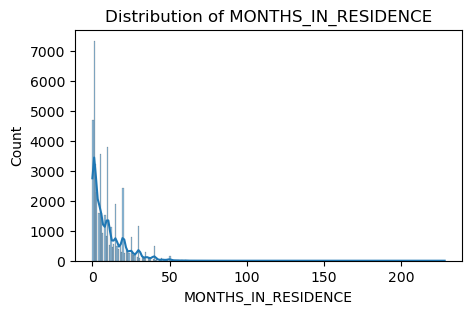

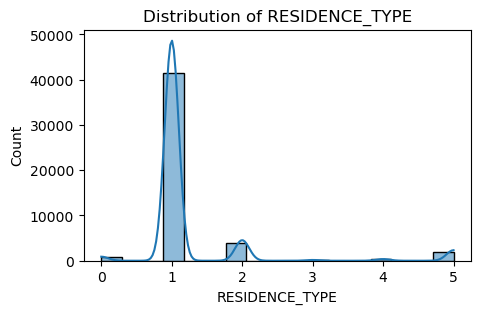

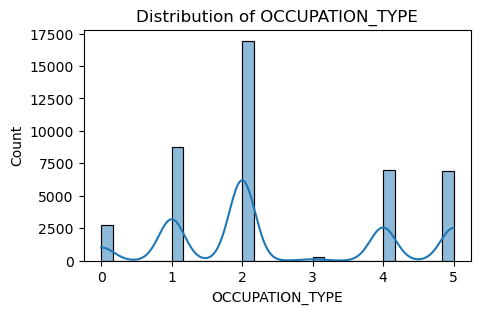

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hist(data, column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(data[column_name].dropna(), kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.show()

plot_hist(selected_df, 'MONTHS_IN_RESIDENCE')
plot_hist(selected_df, 'RESIDENCE_TYPE')
plot_hist(selected_df, 'OCCUPATION_TYPE')

The median may be a better choice for skewed data distributions or those containing extreme values or outliers because it is less sensitive to these extreme values. The median is the value that divides the dataset into two equal parts and is a good option for asymmetric data. MONTHS_IN_RESIDENCE is right-skewed data so we would use median to replace the missing values.

In [6]:
median_MONTHS_IN_RESIDENCE = selected_df['MONTHS_IN_RESIDENCE'].median()
selected_df['MONTHS_IN_RESIDENCE'].fillna(median_MONTHS_IN_RESIDENCE, inplace=True)

In [7]:
median_MONTHS_IN_RESIDENCE = selected_df['MONTHS_IN_RESIDENCE'].median()
selected_df['MONTHS_IN_RESIDENCE'].fillna(median_MONTHS_IN_RESIDENCE, inplace=True)

As for the two other variables RESIDENCE_TYPE and OCCUPATION_TYPE, we will replace their missing values by using the mode. For categorical variables or qualitative data, the mode is often the best choice because the mean and median don't make sense for this type of data.

In [8]:
mode_RESIDENCE_TYPE = selected_df['RESIDENCE_TYPE'].mode()[0]
selected_df['RESIDENCE_TYPE'].fillna(mode_RESIDENCE_TYPE, inplace=True)

In [9]:
mode_OCCUPATION_TYPE = selected_df['OCCUPATION_TYPE'].mode()[0]
selected_df['OCCUPATION_TYPE'].fillna(mode_OCCUPATION_TYPE, inplace=True)

Our group decided to divide the data of NATIONALITY into two types brazilian and non-brazilian.

In [10]:
selected_df['NATIONALITY'] = selected_df['NATIONALITY'].replace([0, 2], 0)

# Check the changed results
print(selected_df['NATIONALITY'].value_counts())

#1=brazil 0=other

1    47884
0     2116
Name: NATIONALITY, dtype: int64


# Visualise some of the selected variables 

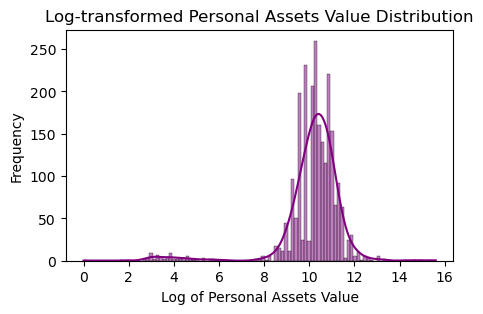

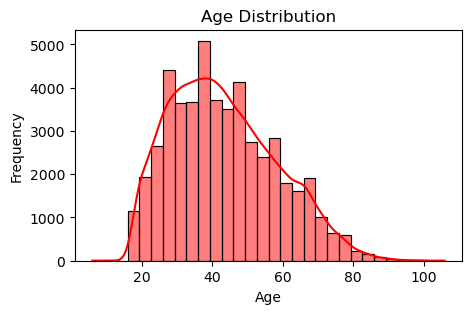

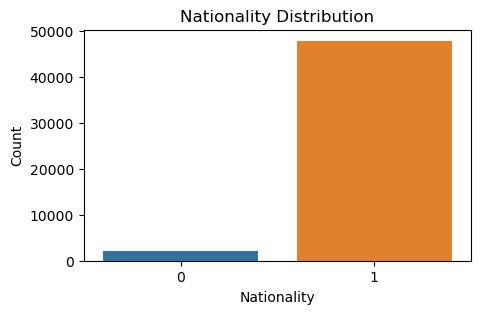

In [11]:
import numpy as np
plt.figure(figsize=(5, 3))

positive_assets = selected_df['PERSONAL_ASSETS_VALUE'][selected_df['PERSONAL_ASSETS_VALUE'] > 0]
sns.histplot(np.log(positive_assets), kde=True, color='purple')
plt.title('Log-transformed Personal Assets Value Distribution')
plt.xlabel('Log of Personal Assets Value')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(5, 3))
sns.histplot(selected_df['AGE'], bins=30, kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='NATIONALITY', data=selected_df)
plt.title('Nationality Distribution')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

# Correlation between the variables 

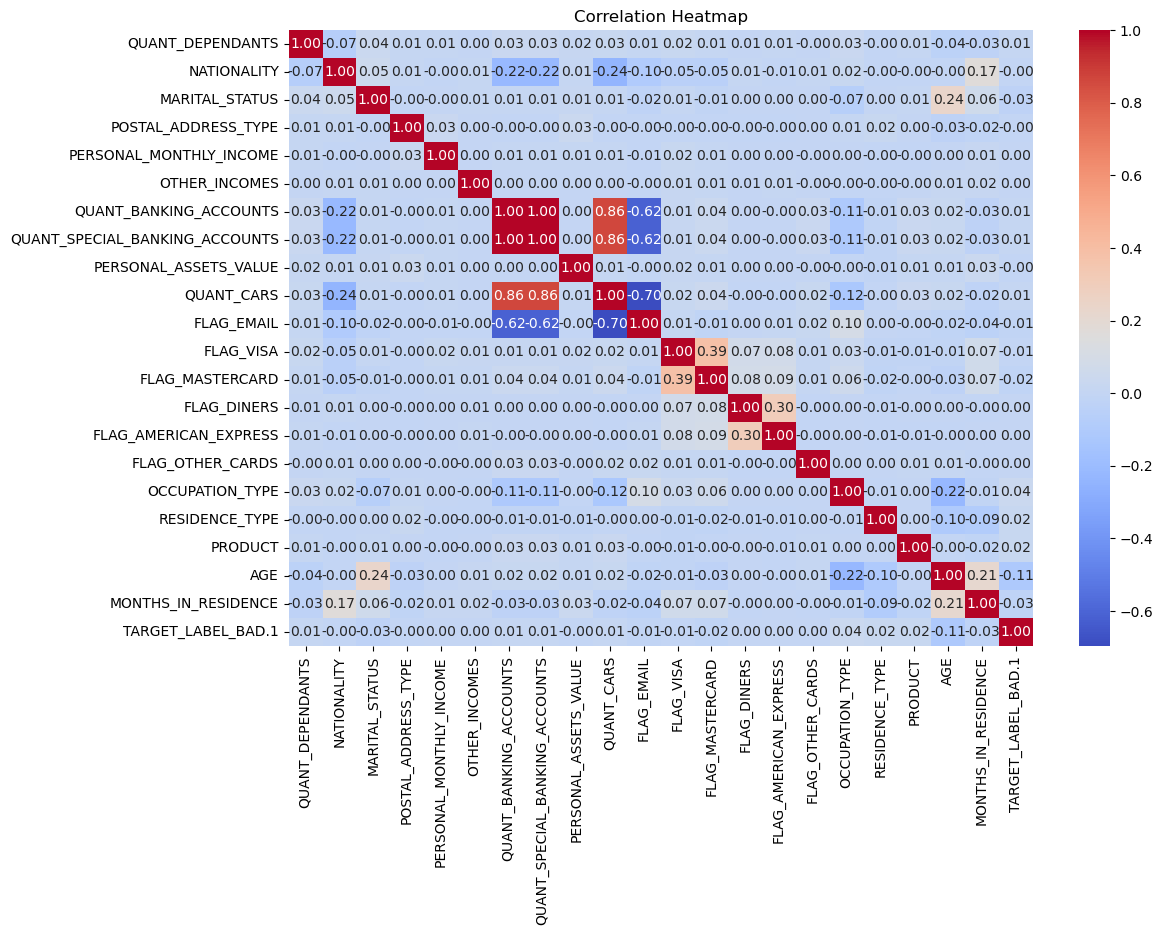

In [12]:
correlation_matrix = selected_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# One-hot encoding
once we complete the action above, we encode all the categorical variables

In [13]:
encoded_df = pd.get_dummies(selected_df, columns=[
                           'NATIONALITY',
                           'MARITAL_STATUS',
                           'POSTAL_ADDRESS_TYPE',
                           'FLAG_EMAIL',
                           'FLAG_VISA',
                           'FLAG_MASTERCARD',
                           'FLAG_DINERS',
                           'FLAG_AMERICAN_EXPRESS',
                           'FLAG_OTHER_CARDS',
                           'COMPANY',
                           'FLAG_PROFESSIONAL_PHONE',
                           'OCCUPATION_TYPE',
                           'RESIDENCE_TYPE',
                           'FLAG_RESIDENCIAL_PHONE',
                           'RESIDENCIAL_STATE',
                           'PRODUCT'
                            ])
print(encoded_df.head())

   QUANT_DEPENDANTS  PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  \
1                 1                    900.0            0.0   
2                 0                    750.0            0.0   
3                 0                    500.0            0.0   
4                 0                    500.0            0.0   
5                 0                   1200.0            0.0   

   QUANT_BANKING_ACCOUNTS  QUANT_SPECIAL_BANKING_ACCOUNTS  \
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
5                       0                               0   

   PERSONAL_ASSETS_VALUE  QUANT_CARS  AGE  MONTHS_IN_RESIDENCE  \
1                    0.0           0   32                 15.0   
2                    0.0           0   34                  1.0   
3                    0.0           0   27               

In [14]:
#make sure the variables were successfully encoded 
print(encoded_df.columns)

Index(['QUANT_DEPENDANTS', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES',
       'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS',
       'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'AGE', 'MONTHS_IN_RESIDENCE',
       'TARGET_LABEL_BAD.1', 'NATIONALITY_0', 'NATIONALITY_1',
       'MARITAL_STATUS_0', 'MARITAL_STATUS_1', 'MARITAL_STATUS_2',
       'MARITAL_STATUS_3', 'MARITAL_STATUS_4', 'MARITAL_STATUS_5',
       'MARITAL_STATUS_6', 'MARITAL_STATUS_7', 'POSTAL_ADDRESS_TYPE_1',
       'POSTAL_ADDRESS_TYPE_2', 'FLAG_EMAIL_0', 'FLAG_EMAIL_1', 'FLAG_VISA_0',
       'FLAG_VISA_1', 'FLAG_MASTERCARD_0', 'FLAG_MASTERCARD_1',
       'FLAG_DINERS_0', 'FLAG_DINERS_1', 'FLAG_AMERICAN_EXPRESS_0',
       'FLAG_AMERICAN_EXPRESS_1', 'FLAG_OTHER_CARDS_0', 'FLAG_OTHER_CARDS_1',
       'COMPANY_N', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_N',
       'FLAG_PROFESSIONAL_PHONE_Y', 'OCCUPATION_TYPE_0.0',
       'OCCUPATION_TYPE_1.0', 'OCCUPATION_TYPE_2.0', 'OCCUPATION_TYPE_3.0',
       'OCCUPATION_TYPE_4.0', '

Make sure the age part is logical.

In [15]:
encoded_df = encoded_df[encoded_df['AGE'] >= 18]

# Detect the outliers

In this analysis we use IQR to detect the outliers.

In [16]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
# Due to the nature of the data, we should only apply this to continuous variables, not binary flags or categorical variables.
# For simplicity, let's assume that columns with a small number of unique values are categorical or binary flags.
numeric_columns = encoded_df.select_dtypes(include=['number']).columns
low_cardinality_cols = [col for col in numeric_columns if encoded_df[col].nunique() < 10]
numeric_columns = numeric_columns.difference(low_cardinality_cols)

# Recalculating outliers only for numeric_columns
outliers = ((encoded_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (encoded_df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Summarizing the outliers for continuous variables
outliers_summary = outliers.sum().sort_values(ascending=False)
outliers_summary

/tmp/ipykernel_169/2371661121.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((encoded_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (encoded_df[numeric_columns] > (Q3 + 1.5 * IQR)))


PERSONAL_MONTHLY_INCOME    4136
QUANT_DEPENDANTS           3977
OTHER_INCOMES              2773
PERSONAL_ASSETS_VALUE      2390
MONTHS_IN_RESIDENCE        1903
                           ... 
MARITAL_STATUS_6              0
MARITAL_STATUS_5              0
MARITAL_STATUS_4              0
MARITAL_STATUS_3              0
TARGET_LABEL_BAD.1            0
Length: 82, dtype: int64

Last look at the statistical information again. 

In [17]:
encoded_df.describe()

,QUANT_DEPENDANTS,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,AGE,MONTHS_IN_RESIDENCE,TARGET_LABEL_BAD.1,...,RESIDENCIAL_STATE_RO,RESIDENCIAL_STATE_RR,RESIDENCIAL_STATE_RS,RESIDENCIAL_STATE_SC,RESIDENCIAL_STATE_SE,RESIDENCIAL_STATE_SP,RESIDENCIAL_STATE_TO,PRODUCT_1,PRODUCT_2,PRODUCT_7
count,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000,4.997900e+04,49979.000000,49979.000000,49979.000000,49979.000000,...,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000
mean,0.650593,886.845001,35.449649,0.357870,0.357870,2.322448e+03,0.336201,43.260029,9.447028,0.260730,...,0.007263,0.001221,0.105164,0.013366,0.005462,0.175514,0.002601,0.853819,0.120291,0.025891
std,1.193588,7848.601817,891.702127,0.479962,0.479962,4.236643e+04,0.472413,14.981541,10.306203,0.439037,...,0.084914,0.034915,0.306768,0.114836,0.073706,0.380410,0.050935,0.353292,0.325304,0.158811
min,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,360.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,31.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,41.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,800.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,54.000000,14.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,53.000000,959000.000000,194344.000000,2.000000,2.000000,6.000000e+06,1.000000,106.000000,228.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# logistic regression

In [18]:
X = encoded_df.drop('TARGET_LABEL_BAD.1', axis=1)
y = encoded_df['TARGET_LABEL_BAD.1']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7340    4]
 [2647    5]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      7344
           1       0.56      0.00      0.00      2652

    accuracy                           0.73      9996
   macro avg       0.65      0.50      0.43      9996
weighted avg       0.69      0.73      0.62      9996



# Adjust weights to achieve balance

In [20]:
# Count the number of categories
class_counts = y.value_counts()

# Calculate weight ratio
weight_ratio = class_counts[0] / class_counts[1]

print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])
print("Weight ratio (Class 0 to Class 1):", weight_ratio)


Class 0 count: 36948
Class 1 count: 13031
Weight ratio (Class 0 to Class 1): 2.835392525516077


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set the parameters for grid search
param_grid = {
    'class_weight': [{0:1, 1:v} for v in [1, 2, 5, 10, 20]]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall') 
grid_search.fit(X_train, y_train)

# View the best parameter combination
print("Best class weights:", grid_search.best_params_)

# Random Forest Threshold Adjustment

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
X = encoded_df.drop('TARGET_LABEL_BAD.1', axis=1)
y = encoded_df['TARGET_LABEL_BAD.1']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.27  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Define the Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced')

# Set the parameter grid
param_grid = {
    'n_estimators': [200, 250, 300, 350, 400]
}

# Define the evaluation metric
scorer = make_scorer(recall_score)  

# Set up grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best number of trees:", best_params['n_estimators'])

In [ ]:
X = encoded_df.drop('TARGET_LABEL_BAD.1', axis=1)
y = encoded_df['TARGET_LABEL_BAD.1']

rf_classifier = RandomForestClassifier(n_estimators=250)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.24  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)


In [ ]:
#find which X is importance
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importances = zip(feature_names, importances)
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6)) 
plt.bar(range(len(importances)), [val[1] for val in sorted_importances], align='center')

plt.xticks(range(len(importances)), [val[0] for val in sorted_importances], rotation=90, fontsize=8)  
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have fitted a classifier and calculated feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importances = zip(feature_names, importances)
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

#Print the top 15 most important variables
top_15_features = sorted_importances[:15]
for feature, importance in top_15_features:
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 5))
plt.bar(range(15), [val[1] for val in top_15_features], align='center')
plt.xticks(range(15), [val[0] for val in top_15_features], rotation=90)
plt.title('Top 15 Feature Importances')
plt.tight_layout()  
plt.show()

In [ ]:
df15 = encoded_df[['QUANT_DEPENDANTS',
                          'OCCUPATION_TYPE_2.0',
                           'PERSONAL_MONTHLY_INCOME',
                          'MONTHS_IN_RESIDENCE',
                           'MARITAL_STATUS_2',
                           'COMPANY_Y',
                           'COMPANY_N',
                           'OCCUPATION_TYPE_5.0',
                           'RESIDENCIAL_STATE_BA',
                           'RESIDENCIAL_STATE_SP',
                           'RESIDENCIAL_STATE_CE',
                           'RESIDENCIAL_STATE_PE',
                           'PRODUCT_1',
                           'AGE',
                           'QUANT_CARS',
                           'TARGET_LABEL_BAD.1']]


In [ ]:
X = df15.drop('TARGET_LABEL_BAD.1', axis=1)
y = df15['TARGET_LABEL_BAD.1']

rf_classifier = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.27  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

def find_best_rf_parameters(X_train, y_train, param_grid, cv=5, scoring_metric=recall_score):
    
    # Define the classifier
    rf = RandomForestClassifier(class_weight='balanced')

    # Define the scorer
    scorer = make_scorer(scoring_metric)

    # Set up and perform grid search
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=cv)
    grid_search.fit(X_train, y_train)

    # Find and return the best parameters
    return grid_search.best_params_

# Usage
param_grid = {'n_estimators': [200, 250, 300]}
best_params = find_best_rf_parameters(X_train, y_train, param_grid)
print("Best parameters:", best_params)


In [ ]:
X = df15.drop('TARGET_LABEL_BAD.1', axis=1)
y = df15['TARGET_LABEL_BAD.1']


rf_classifier = RandomForestClassifier(n_estimators=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.25  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)


In [ ]:
#TOP 10
df10 = encoded_df[['QUANT_DEPENDANTS',
                          'OCCUPATION_TYPE_2.0',
                           'PERSONAL_MONTHLY_INCOME',
                          'MONTHS_IN_RESIDENCE',
                           'COMPANY_Y',
                           'COMPANY_N',
                           'RESIDENCIAL_STATE_BA',
                           'RESIDENCIAL_STATE_SP',
                           'RESIDENCIAL_STATE_CE',
                           'AGE',
                           'TARGET_LABEL_BAD.1']]


In [ ]:
X = df10.drop('TARGET_LABEL_BAD.1', axis=1)
y = df10['TARGET_LABEL_BAD.1']

rf_classifier = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.25  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)



In [ ]:
# Define the Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced')

# Set the parameter grid
param_grid = {
    'n_estimators': [200, 250, 300, 350]
}

# Define the evaluation metric
scorer = make_scorer(recall_score)  

# Set up grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best number of trees:", best_params['n_estimators'])


In [ ]:
X = df10.drop('TARGET_LABEL_BAD.1', axis=1)
y = df10['TARGET_LABEL_BAD.1']

rf_classifier = RandomForestClassifier(n_estimators=350)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.27  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)



In [ ]:
df5 = encoded_df[['QUANT_DEPENDANTS',
                          
                           'PERSONAL_MONTHLY_INCOME',
                          'MONTHS_IN_RESIDENCE',
                          
                           'RESIDENCIAL_STATE_SP',
                           'AGE',
                           'TARGET_LABEL_BAD.1']]

In [ ]:
X = df5.drop('TARGET_LABEL_BAD.1', axis=1)
y = df5['TARGET_LABEL_BAD.1']

rf_classifier = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.17  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)



In [ ]:
# Define the Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced')

# Set the parameter grid
param_grid = {
    'n_estimators': [ 250, 300, 350,400]
}

# Define the evaluation metric
scorer = make_scorer(recall_score)  

# Set up grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best number of trees:", best_params['n_estimators'])


In [ ]:
X = df5.drop('TARGET_LABEL_BAD.1', axis=1)
y = df5['TARGET_LABEL_BAD.1']

rf_classifier = RandomForestClassifier(n_estimators=250)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

In [ ]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
# This is usually the point where TPR is high and FPR is low, but it can also be chosen based on other metrics (like Youden's J statistic)
# Here, we simply choose the point closest to the top-left corner
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# point the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # red
plt.annotate(f'Best Threshold = {optimal_threshold:.2f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(fpr[optimal_idx], tpr[optimal_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

# Display the optimal threshold
print(f"The optimal threshold is {optimal_threshold:.2f}")


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Made classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# To improve the model's predictive performance for class 1, try adjusting the threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Get the probability of being predicted as class 1
threshold = 0.18  # Adjust the threshold based on the results above
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix and Classification Report using the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_threshold)

class_report_threshold = classification_report(y_test, y_pred_threshold)
print("Classification Report with custom threshold:")
print(class_report_threshold)


## Balanced Random Forest

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare data
X = encoded_df.drop('TARGET_LABEL_BAD.1', axis=1)
y = encoded_df['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score


conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier()

# Set up the parameter grid
param_grid = {
    'n_estimators': [150, 200, 250, 300]
}

# Perform grid search
grid_search = GridSearchCV(brf, param_grid, cv=5, scoring='recall')  
grid_search.fit(X_train, y_train)

# View the best parameters
print("Best number of trees:", grid_search.best_params_['n_estimators'])


In [ ]:
# Prepare data
X = encoded_df.drop('TARGET_LABEL_BAD.1', axis=1)
y = encoded_df['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=250, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)

In [ ]:
#TOP 15

X = df15.drop('TARGET_LABEL_BAD.1', axis=1)
y = df15['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)

In [ ]:
# Initialize the Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier()

# Set up the parameter grid
param_grid = {
    'n_estimators': [200, 250, 300,350]
}

# Perform grid search
grid_search = GridSearchCV(brf, param_grid, cv=5, scoring='recall')  
grid_search.fit(X_train, y_train)

# View the best parameters
print("Best number of trees:", grid_search.best_params_['n_estimators'])


In [ ]:
X = df15.drop('TARGET_LABEL_BAD.1', axis=1)
y = df15['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)

In [ ]:
#10
df10 = encoded_df[['QUANT_DEPENDANTS',
                          'OCCUPATION_TYPE_2.0',
                           'PERSONAL_MONTHLY_INCOME',
                          'MONTHS_IN_RESIDENCE',
                           'COMPANY_Y',
                           'COMPANY_N',
                           'RESIDENCIAL_STATE_BA',
                           'RESIDENCIAL_STATE_SP',
                           'RESIDENCIAL_STATE_CE',
                           'AGE',
                           'TARGET_LABEL_BAD.1']]


In [ ]:
X = df10.drop('TARGET_LABEL_BAD.1', axis=1)
y = df10['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)

In [ ]:
# Initialize the Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier()

# Set up the parameter grid
param_grid = {
    'n_estimators': [200,250,300,350]
}

# Perform grid search
grid_search = GridSearchCV(brf, param_grid, cv=5, scoring='recall')  
grid_search.fit(X_train, y_train)

# View the best parameters
print("Best number of trees:", grid_search.best_params_['n_estimators'])


In [ ]:
X = df10.drop('TARGET_LABEL_BAD.1', axis=1)
y = df10['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)

In [ ]:
#5
df5 = encoded_df[['QUANT_DEPENDANTS',
                           'PERSONAL_MONTHLY_INCOME',
                          'MONTHS_IN_RESIDENCE',
                           'RESIDENCIAL_STATE_SP',
                           'AGE',
                           'TARGET_LABEL_BAD.1']]


In [ ]:
X = df5.drop('TARGET_LABEL_BAD.1', axis=1)
y = df5['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)

In [ ]:
# Initialize the Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier()

# Set up the parameter grid
param_grid = {
    'n_estimators': [200,250,300,350]
}

# Perform grid search
grid_search = GridSearchCV(brf, param_grid, cv=5, scoring='recall')  
grid_search.fit(X_train, y_train)

# View the best parameters
print("Best number of trees:", grid_search.best_params_['n_estimators'])


In [ ]:
X = df5.drop('TARGET_LABEL_BAD.1', axis=1)
y = df5['TARGET_LABEL_BAD.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("MCC:", mcc)